In [235]:
# Libraries
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Extend PATH Variable
import sys
sys.path.append("src/")

# NanoNets Simulation Tool
import nanonets

Init disordered Network Topology and Electrostatic Properties:
- Number of nanopartciles $N_{NP}$ and number of junctions per $N_{J}$
- Electrode Positions as list of cartesian coordinates `[[x_1, y_1], [x_2, y_2], [x_3, y_3], ...]` \
Network is placed inside box of size 1 with electrodes attached to closest nanoparticle

In [236]:
# Network Style
network_topology = "random"

# Network Parameter
topology_parameter  = {
    "Np"    : 2,
    "Nj"    : 1,
    "e_pos" : [[-1,-1],[1,1]]
}

# Save Folder
folder  = "test_runs/"

# Topology Class
np_network_sim = nanonets.simulation(network_topology=network_topology, folder=folder, topology_parameter=topology_parameter)

Display Network Topology

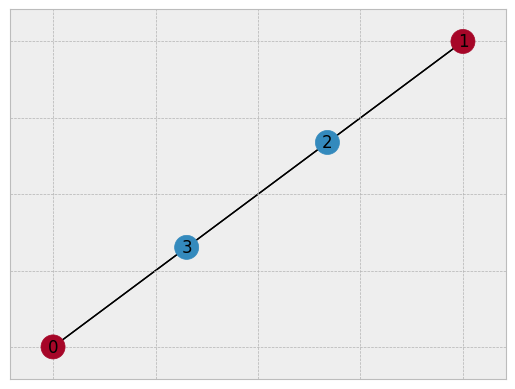

In [237]:
# Node Positions
fixed_pos                               = {i : val for i, val in enumerate(topology_parameter["e_pos"])}
pos                                     = nx.spring_layout(G=np_network_sim.G, pos=fixed_pos, fixed=[i for i in range(np_network_sim.N_electrodes)])
pos_vals                                = np.array(list(dict(sorted(pos.items())).values()))
pos_vals_e                              = pos_vals[np_network_sim.N_electrodes:]
pos_vals_e                              = 1.6*(pos_vals_e - np.min(pos_vals_e,axis=0))/(np.max(pos_vals_e,axis=0) - np.min(pos_vals_e,axis=0)) - 0.8
pos_vals[np_network_sim.N_electrodes:]  = pos_vals_e

for i in range(np_network_sim.N_particles):
    pos[i] = pos_vals[i,:]

# Node Colors
colors                                  = np.repeat('#348ABD', np_network_sim.N_particles+np_network_sim.N_electrodes)
colors[-np_network_sim.N_electrodes:]   = '#A60628'

# Display Graph
with plt.style.context(["bmh"]):

    fig = plt.figure()
    ax  = fig.add_subplot()
    nx.draw_networkx(G=np_network_sim.G, pos=pos, ax=ax, node_color=colors, arrows=False)
    plt.show()

Input Voltages

Number of Steps: 20000


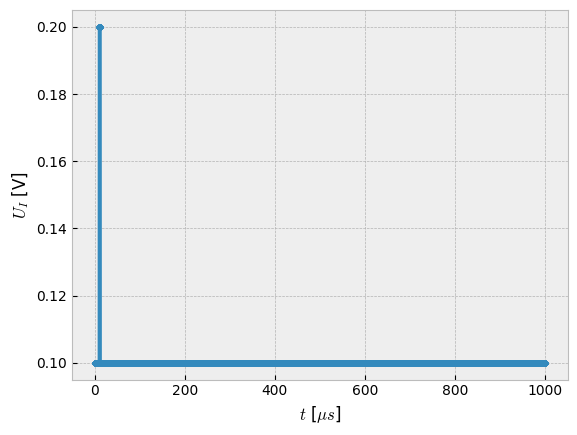

In [238]:
# Define Time Scale
step_size   = 5e-8
max_time    = 10e-4
time_steps  = np.arange(0,max_time,step_size)
N_steps     = len(time_steps)
print(f"Number of Steps: {N_steps}")

# Define Peak
t_min_peak  = 10e-6
t_max_peak  = 13e-6
peak_bounds = (time_steps >= t_min_peak) & (time_steps <= t_max_peak)

# Input Voltages
input_volt              = np.repeat(0.1,N_steps)
input_volt[peak_bounds] = 0.2

# Voltage Array
voltages        = np.zeros((N_steps, np_network_sim.N_electrodes+1))
voltages        = np.zeros((N_steps, np_network_sim.N_electrodes+1))
voltages[:,0]   = input_volt

# Plot
with plt.style.context("bmh"):
    
    plt.plot(time_steps*10**6, input_volt, '.-')
    plt.xlabel("$t$ [$\mu s$]")
    plt.ylabel("$U_I$ [V]")
    plt.show()

In [239]:
np_network_sim = nanonets.simulation(network_topology=network_topology, folder=folder, topology_parameter=topology_parameter)
np_network_sim.run_var_voltages(voltages=voltages, time_steps=time_steps, target_electrode=1, save_th=.1)

In [240]:
start_val   = 100
output_vals = np_network_sim.return_output_values()
output_I    = output_vals[:,2]/1000
output_I    = output_I[start_val:]
microstate  = np_network_sim.return_microstates()
microstate  = microstate[start_val:]

In [241]:
print(f"Average Jumps per Step: {np.round(np.mean(output_vals[1:,1] - output_vals[:-1,1]),2)}")

Average Jumps per Step: 641.96


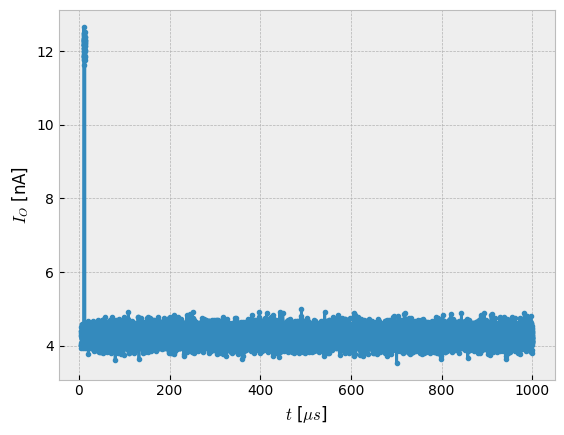

In [242]:
with plt.style.context("bmh"):
    
    plt.plot(time_steps[start_val+1:]*10**6, output_I, '.-')
    plt.xlabel("$t$ [$\mu s$]")
    plt.ylabel("$I_O$ [nA]")
    # plt.ylim(-8,8)
    plt.show()

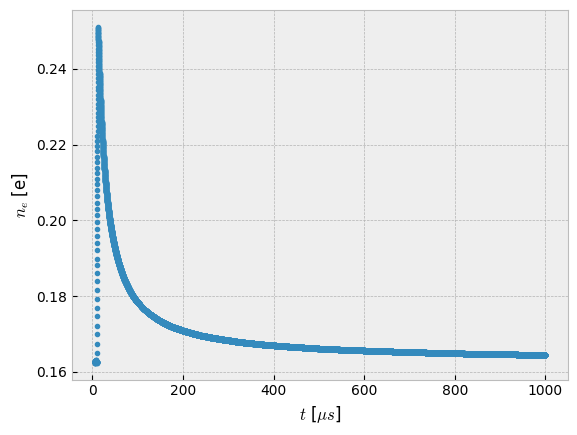

In [243]:
with plt.style.context("bmh"):
    
    plt.plot(time_steps[start_val+1:]*10**6, microstate[:,0], '.')
    # plt.plot(time_steps[1:]*10**6, microstate[:,-1], '.')
    plt.xlabel("$t$ [$\mu s$]")
    plt.ylabel("$n_e$ [e]")
    plt.show()

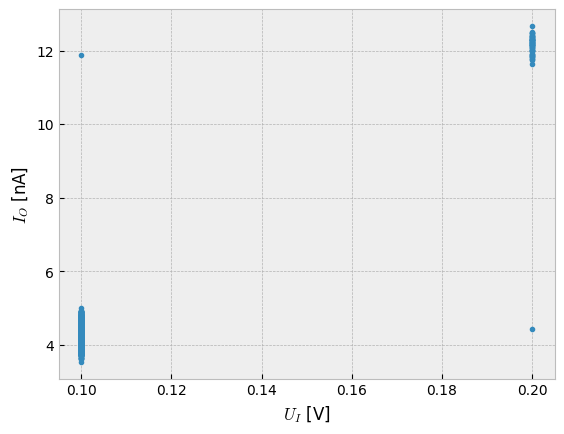

In [245]:
with plt.style.context("bmh"):
    
    plt.plot(input_volt[start_val+1:], output_I, '.')
    plt.xlabel("$U_I$ [V]")
    plt.ylabel("$I_O$ [nA]")
    # plt.ylim(-8,8)
    plt.show()